# MUTUAL FUNDS MACHINE LEARNING

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [3]:
from pycaret.regression import *

## Import Database

In [4]:
df = pd.read_csv(r'C:\Workbook\Funds\mutual_funds.csv')

In [5]:
df.shape

(17839, 87)

### CLEAN Database

In [6]:
df.isna().sum().sum()

219420

In [7]:
df.dropna(inplace = True)

In [8]:
df.isna().sum().sum()

0

In [9]:
df.shape

(8080, 87)

## REMOVE COLUMNS X-Y

In [10]:
df.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'category', 'rating', 'return_rating', 'risk_rating', 'investment_type',
       'size_type', 'currency', 'fund_net_annual_expense_ratio', 'asset_cash',
       'asset_stocks', 'asset_bonds', 'asset_others', 'asset_preferred',
       'asset_convertable', 'price_earnings_ratio', 'price_book_ratio',
       'price_sales_ratio', 'price_cashflow_ratio', 'median_market_cap',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'fund_return_5years', 'fund_return_10years',
       'fund_return_2020_q3', 'fund_return_2020_q2', 'fund_return_2020_q1',
       'fund_return_2019_q4', 'fund_return_2019_q3', 'fund_return_2019_q2',
       'fund_return_2019_q1', 'fund_return_201

In [12]:
dfp = df[['asset_cash',
       'asset_stocks', 'asset_bonds', 'asset_others', 'asset_preferred',
       'asset_convertable', 'price_earnings_ratio', 'price_book_ratio',
       'price_sales_ratio', 'price_cashflow_ratio', 'median_market_cap',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology','fund_return_10years']]

## PYCARET

### CONFIGURATION

In [13]:
reg  =setup(dfp, target = 'fund_return_10years', session_id = 123, log_experiment = True, experiment_name = 'fund_analysis')

,Description,Value
0,session_id,123
1,Target,fund_return_10years
2,Original Data,"(8080, 23)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5655, 22)"


## BEST MODEL ACCORDING TO PYCARET

In [14]:
best_model = compare_models(fold = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.7422,1.6292,1.2617,0.9106,0.1656,0.1525,3.3560
rf,Random Forest Regressor,0.8219,2.0039,1.3999,0.8900,0.1879,0.1829,7.2320
lightgbm,Light Gradient Boosting Machine,0.9650,2.2749,1.4994,0.8747,0.2143,0.2210,2.4880
dt,Decision Tree Regressor,0.9238,3.2051,1.7713,0.8239,0.2374,0.1860,0.2280
gbr,Gradient Boosting Regressor,1.3855,3.7599,1.9355,0.7919,0.2836,0.3832,2.8660
ada,AdaBoost Regressor,1.9723,6.3608,2.5216,0.6466,0.3573,0.5192,1.1880
ridge,Ridge Regression,1.8777,6.4967,2.5472,0.6398,0.3762,0.5680,0.0400
lr,Linear Regression,1.8777,6.4969,2.5472,0.6397,0.3762,0.5680,3.4400
br,Bayesian Ridge,1.8755,6.4997,2.5478,0.6396,0.3774,0.5678,0.0480
en,Elastic Net,1.8971,6.7822,2.6022,0.6240,0.3900,0.5771,0.0380


##  BEST MODEL - EXTRA TREE REGRESSOR

In [15]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6939,2.0719,1.4394,0.8911,0.1633,0.1381
1,0.7668,2.3860,1.5447,0.8807,0.1957,0.1373
2,0.6980,1.2237,1.1062,0.9309,0.1678,0.1787
3,0.7044,1.5149,1.2308,0.9096,0.1611,0.1558
4,0.7507,1.6018,1.2656,0.9195,0.1797,0.1390
5,0.7740,1.7586,1.3261,0.8985,0.1821,0.1459
6,0.6588,1.0523,1.0258,0.9385,0.1324,0.1227
7,0.6520,1.0547,1.0270,0.9415,0.1254,0.1118
8,0.6307,0.9027,0.9501,0.9461,0.1501,0.1760
9,0.7036,1.2486,1.1174,0.9280,0.1744,0.1805


## TUNE RANDOM EXTRA TREE REGRESSOR

In [ ]:
tuned_et = tune_model(et, n_iter = 50, optimize = 'MAE')

## VISUALISATION

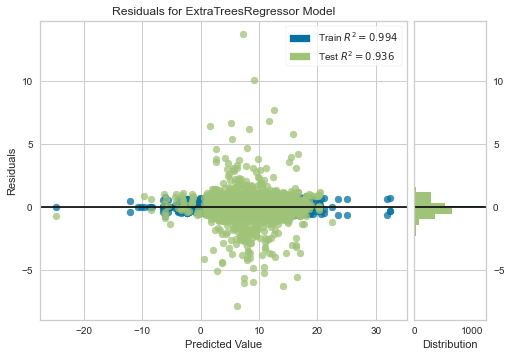

In [16]:
plot_model(et)

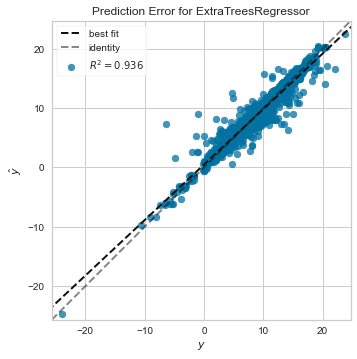

In [17]:
plot_model(et, plot = 'error')

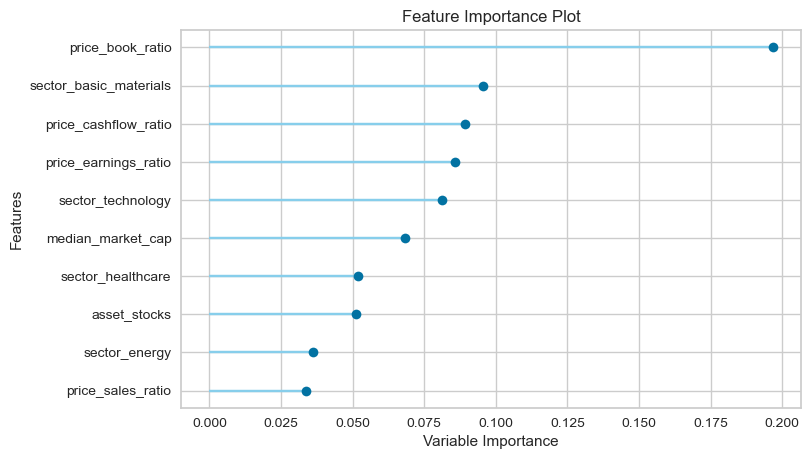

In [18]:
plot_model(et, plot = 'feature')

## EVALUATE MODEL

In [19]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## INTERPRETATION OF MODEL (SHapley Additive exPlanations)

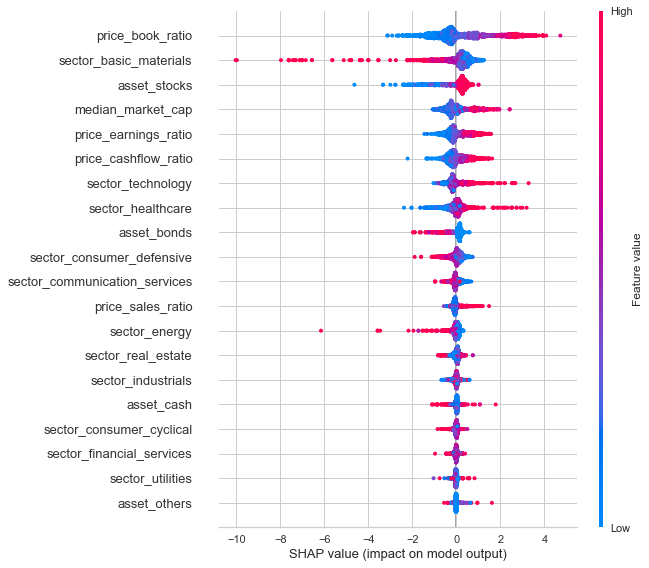

In [20]:
interpret_model(et)

## AUTO MACHINE LEARNING

In [21]:
auto_ml = automl(optimize = 'MAE')
print(auto_ml)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


## PREDICTIONS

In [23]:
pred = predict_model(auto_ml)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6634,1.1433,1.0693,0.9357,0.1454,0.2249


In [24]:
rename_map = {'Label':'Predictions'}
pred.rename(columns = rename_map, inplace = True)
pred.head(5)

,asset_cash,asset_stocks,asset_bonds,asset_others,asset_preferred,asset_convertable,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,...,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,fund_return_10years,Predictions
0,41.209999,53.919998,0.00,4.87,0.00,0.00,17.670000,2.82,1.56,11.400000,...,0.0,8.13,25.790001,0.00,0.200000,5.99,24.27,2.430000,-1.06,9.065782
1,1.020000,63.669998,33.98,0.00,0.99,0.34,24.549999,2.99,2.66,14.500000,...,0.0,6.67,14.760000,0.00,10.290000,3.50,10.34,27.850000,8.24,7.716667
2,0.100000,99.900002,0.00,0.00,0.00,0.00,35.709999,9.78,4.78,23.530001,...,0.0,3.31,14.060000,1.36,14.380000,0.00,5.65,39.639999,14.93,14.513333
3,2.140000,97.860001,0.00,0.00,0.00,0.00,34.900002,8.15,3.62,23.510000,...,0.0,1.03,15.620000,0.00,7.120000,0.00,10.94,34.529999,17.77,17.480000
4,0.920000,95.750000,0.00,3.33,0.00,0.00,21.070000,1.80,1.95,15.160000,...,0.0,5.52,2.300000,0.00,18.280001,0.00,9.76,12.990000,9.36,9.430000


## PREDICTIONS ON ALL DB

In [25]:
df1 = df.copy()

In [ ]:
#WILL REMOVE THE Y Column
#df1.drop(['fund_return_10years'], axis = 1 , inplace= True)

In [28]:
predictions = predict_model(auto_ml, data= df1)
predictions[['fund_extended_name','fund_return_10years','Label']].sample(20)

,fund_extended_name,fund_return_10years,Label
9284,West Hills Tactical Core Fund,-1.06,9.065782
7919,Ivy Balanced Fund Class I,8.24,7.716667
3356,"BNY Mellon Research Growth Fund, Inc. Class Z",14.93,14.513333
8260,JPMorgan Growth Advantage Fund Class I,17.77,17.480000
11901,Davis New York Venture Fund Class R,9.36,9.430000
13399,Putnam RetirementReady 2020 Fund Class Y,4.29,4.020000
10074,BlackRock Advantage Large Cap Value Fund Inves...,8.59,8.303333
2105,Columbia Pacific/Asia Fund Class C,7.04,6.436664
10035,"BlackRock Emerging Markets Fund, Inc. Investor...",3.43,3.185000
14612,American Funds Washington Mutual Investors Fun...,11.15,11.052857


# NORMAL METHOD

In [29]:
df2 = pd.read_csv(r'C:\Workbook\Funds\mutual_funds.csv')

In [30]:
df2.head(5)

,fund_symbol,fund_extended_name,fund_family,inception_date,category,rating,return_rating,risk_rating,investment_type,size_type,...,fund_return_2010_q2,fund_return_2010_q1,fund_alpha_5years,fund_alpha_10years,fund_beta_5years,fund_beta_10years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,DWS,2007-07-29,World Allocation,3.0,3.0,3.0,Blend,Large,...,-2.53,2.23,-2.86,-3.86,1.05,0.93,10.39,8.67,0.33,0.24
1,AAADX,Aberdeen Income Builder Fund Class A,Aberdeen,2011-12-29,Allocation - 50% to 70% Equity,4.0,5.0,5.0,Blend,Large,...,NaN,NaN,-0.30,-0.15,1.36,1.45,10.21,11.70,0.74,0.89
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Thrivent Funds,1999-10-28,Large Growth,3.0,3.0,4.0,Growth,Large,...,-14.29,4.09,2.92,0.77,1.04,1.08,16.49,15.40,0.88,0.93
3,AAAIX,American Century Strategic Allocation: Aggress...,American Century Investments,2000-07-31,Allocation - 70% to 85% Equity,4.0,4.0,3.0,Blend,Large,...,-8.13,3.92,-0.78,-0.48,1.39,1.37,12.35,11.44,0.61,0.73
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Horizon Investments,2012-01-30,Tactical Allocation,3.0,4.0,5.0,Blend,Large,...,NaN,NaN,-4.38,NaN,1.67,NaN,15.06,NaN,0.37,NaN


In [31]:
df2.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'category', 'rating', 'return_rating', 'risk_rating', 'investment_type',
       'size_type', 'currency', 'fund_net_annual_expense_ratio', 'asset_cash',
       'asset_stocks', 'asset_bonds', 'asset_others', 'asset_preferred',
       'asset_convertable', 'price_earnings_ratio', 'price_book_ratio',
       'price_sales_ratio', 'price_cashflow_ratio', 'median_market_cap',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'fund_return_5years', 'fund_return_10years',
       'fund_return_2020_q3', 'fund_return_2020_q2', 'fund_return_2020_q1',
       'fund_return_2019_q4', 'fund_return_2019_q3', 'fund_return_2019_q2',
       'fund_return_2019_q1', 'fund_return_201

In [32]:
df2.dropna(inplace = True)

In [33]:
df2.isna().sum().sum()

0

In [34]:
X = df2[['price_earnings_ratio',
       'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology']]
X.head()

,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology
0,19.41,1.83,2.30,11.13,13.52,1.62,0.00,42.97,1.54,0.00,15.29,1.67,11.53,11.87,0.00
2,38.70,11.46,5.31,26.26,1.09,20.42,14.43,1.32,0.86,12.87,0.00,11.63,0.00,3.20,34.18
3,21.81,2.45,1.44,11.45,3.49,12.79,12.07,5.72,7.54,14.48,2.49,7.36,2.31,11.89,19.86
5,19.41,1.83,2.30,11.13,13.52,1.62,0.00,42.97,1.54,0.00,15.29,1.67,11.53,11.87,0.00
7,21.81,2.45,1.44,11.45,3.49,12.79,12.07,5.72,7.54,14.48,2.49,7.36,2.31,11.89,19.86


In [35]:
y = df2[['fund_return_10years']]
y.sample(5)

,fund_return_10years
4486,13.39
393,8.01
9146,5.86
11371,5.18
10993,11.16


### TRAINING AND TESTING DATA

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### SCALING DATA

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
ss = StandardScaler()

In [40]:
scaler = ss.fit(X_train)

#### FITTING XTRAIN

In [41]:
X_train = scaler.transform(X_train)

In [42]:
X_test = scaler.transform(X_test)

In [43]:
X_train

array([[ 1.61119882, -0.32918053,  1.8605566 , ..., -0.4882856 ,
        -1.55196897, -1.63296054],
       [-1.33756886, -1.08292918, -1.03301308, ...,  0.4757243 ,
        -0.08691541, -1.22061904],
       [-0.31721945, -0.50092073, -0.66290533, ..., -0.17354356,
         0.79624364, -0.16822508],
       ...,
       [ 1.20839239,  1.26895745,  0.36666714, ..., -0.41094899,
         0.7838629 , -0.36252673],
       [ 2.4168117 ,  2.89571879,  2.5805844 , ..., -0.4882856 ,
        -1.01134357,  1.30090633],
       [-0.9109028 , -0.82531888, -0.93880383, ..., -0.11239368,
         0.68206575, -0.52253984]])

In [44]:
X_test

array([[ 0.51927057,  0.34346859,  0.62237795, ...,  0.21134099,
        -1.12001891,  0.35225714],
       [ 0.02102568, -0.01432349, -0.12456678, ..., -0.22929787,
        -0.54637822, -0.11811109],
       [ 2.31996973,  1.93683601,  2.22393511, ..., -0.4882856 ,
        -0.62478953,  0.52809573],
       ...,
       [-1.25476196, -0.92550067, -0.94553306, ..., -0.34440353,
         0.7095785 , -0.5770498 ],
       [-0.51792091,  0.18604008, -0.27260988, ..., -0.29764185,
         0.26662334,  1.22529574],
       [-0.05195667, -0.49615017, -0.32644374, ..., -0.02786296,
        -0.05527576, -0.16294993]])

### MODEL 1 - Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predictions

In [48]:
predictions = lr.predict(X_test)

In [49]:
print(lr.intercept_)

[8.24669709]


In [50]:
lr.coef_[0]

array([ 0.42340795,  1.96467211,  0.12472226, -0.23970667, 21.62435032,
       16.8755849 , 16.93703491, 38.8834327 , 14.15788467, 29.37964116,
       17.71162633, 17.34473928, 12.94786165, 17.86445411, 28.16367693])

In [51]:
index = X.columns
index.tolist()

['price_earnings_ratio',
 'price_book_ratio',
 'price_sales_ratio',
 'price_cashflow_ratio',
 'sector_basic_materials',
 'sector_consumer_cyclical',
 'sector_financial_services',
 'sector_real_estate',
 'sector_consumer_defensive',
 'sector_healthcare',
 'sector_utilities',
 'sector_communication_services',
 'sector_energy',
 'sector_industrials',
 'sector_technology']

In [52]:
type(index)

pandas.core.indexes.base.Index

In [54]:
coef_list = lr.coef_
coef_list[0].tolist()

[0.42340795330210723,
 1.9646721066508286,
 0.12472225566073514,
 -0.2397066740032625,
 21.62435032482741,
 16.87558489646621,
 16.937034908853846,
 38.88343269706212,
 14.157884670160268,
 29.379641157406688,
 17.71162633434461,
 17.344739281050522,
 12.947861646143753,
 17.864454110251494,
 28.163676927995223]

In [55]:
type(coef_list)

numpy.ndarray

In [56]:
#Convert the lr.coef_ into a list --> coef_list = [..]; convert the columns name into a list --> index =[X.columns]; name of the column = ['Coef
cdf = pd.DataFrame(data = coef_list.transpose(), index = index ,columns=['Coeff'])
cdf

,Coeff
price_earnings_ratio,0.423408
price_book_ratio,1.964672
price_sales_ratio,0.124722
price_cashflow_ratio,-0.239707
sector_basic_materials,21.624350
sector_consumer_cyclical,16.875585
sector_financial_services,16.937035
sector_real_estate,38.883433
sector_consumer_defensive,14.157885
sector_healthcare,29.379641


In [57]:
#USE %.2f for a float with 2 decimals, close the brackets then use % and brackets %(xxx))
print("the intercept or B is %.2f"     %(lr.intercept_))

the intercept or B is 8.25


Text(0, 0.5, 'Predicted values')

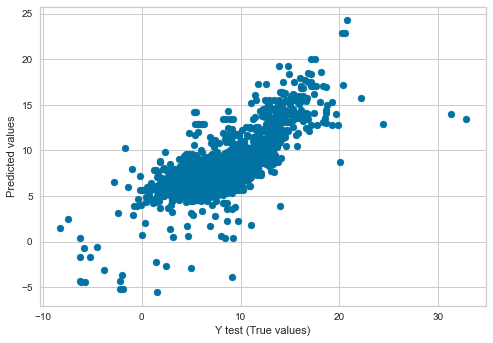

In [58]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test (True values)')
plt.ylabel ('Predicted values')

In [59]:
lr.score(X_test,y_test)

0.5738410009555814

#### EVALUATE SCORES

In [60]:
from sklearn import metrics

In [61]:
#or from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [62]:
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 2.081175365208362
MSE 7.326428519364038
RMSE 2.7067376155372056


#### R2 SCORE

In [63]:
metrics.explained_variance_score(y_test,predictions)

0.5738423929834164

In [64]:
r2_score(y_test, predictions)

0.5738410009555814

<Figure size 1080x1080 with 0 Axes>

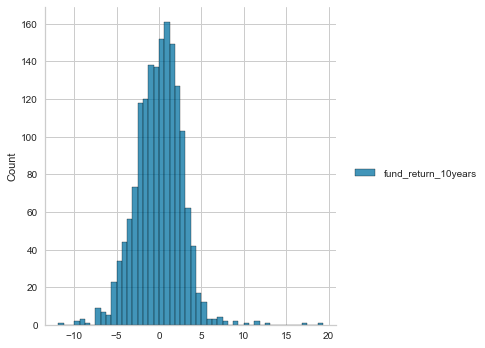

In [65]:
plt.figure(figsize =(15,15))
sns.displot((y_test - predictions), bins = 50)